In [ ]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train) , (x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

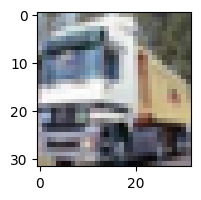

In [ ]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[1])

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),


    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3461 - loss: 1.7962 - val_accuracy: 0.5371 - val_loss: 1.3249
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5602 - loss: 1.2491 - val_accuracy: 0.6039 - val_loss: 1.1376
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6194 - loss: 1.0900 - val_accuracy: 0.6325 - val_loss: 1.0440
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6550 - loss: 0.9832 - val_accuracy: 0.6495 - val_loss: 1.0047
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6870 - loss: 0.9033 - val_accuracy: 0.6629 - val_loss: 0.9850
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7086 - loss: 0.8496 - val_accuracy: 0.6702 - val_loss: 0.9628
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7210 - loss: 0.8035 - val_accuracy: 0.6687 - val_loss: 0.9555
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7406 - loss: 0.7563 - val_accuracy: 0.

In [ ]:
loss,acc = model.evaluate(x_test,y_test)
print(loss)
print(acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6943 - loss: 1.0019
1.0165107250213623
0.6901999711990356


In [ ]:
classes = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

def predict(image_index):
  image = x_test[image_index]
  true_label = np.argmax(y_test[image_index])
  prediction = model.predict(np.expand_dims(image, axis=0))
  predicted_label = np.argmax(prediction)
  plt.imshow(image)
  plt.title(f"True: {classes[true_label]} | Predicted: {classes[predicted_label]}")
  plt.axis('off')
  return plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


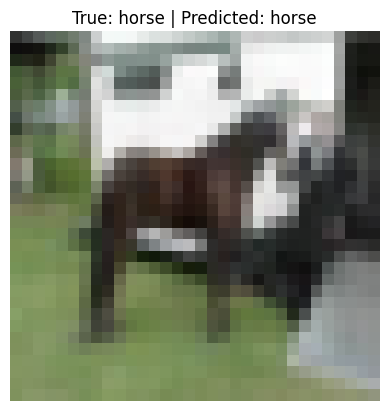

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


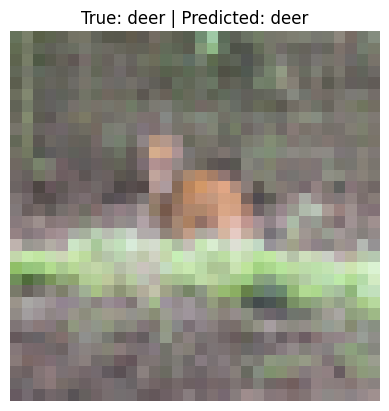

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


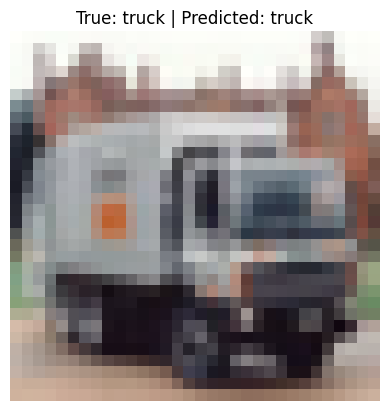

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


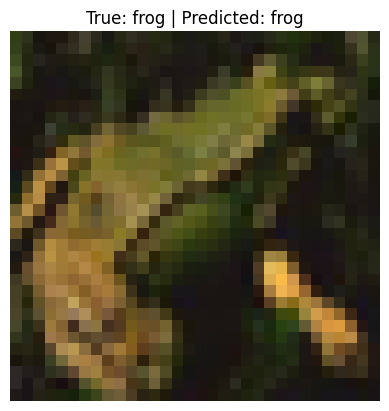

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


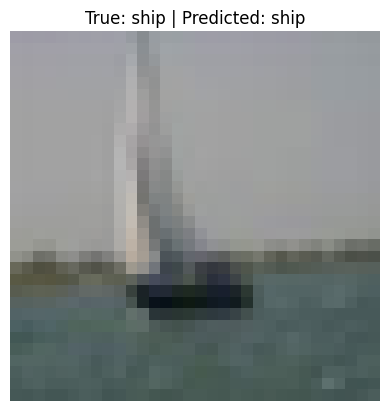

In [ ]:
predict(20)
predict(32)
predict(11)
predict(41)
predict(55)

First, we'll generate code to upload an image file.

Saving Labrador_Retriever_portrait.jpg to Labrador_Retriever_portrait (1).jpg
Saving photo-1615789591457-74a63395c990.jpeg to photo-1615789591457-74a63395c990 (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


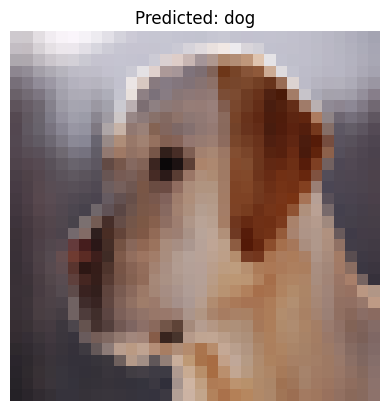

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


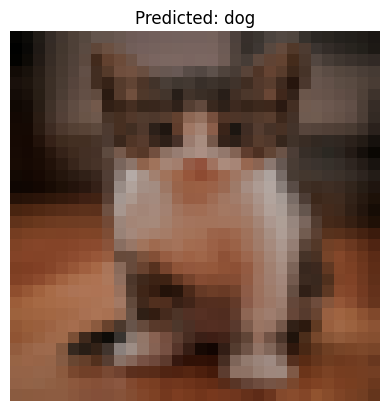

In [ ]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

for filename in uploaded.keys():
  # Load the image
  img = Image.open(filename).convert('RGB')

  # Resize the image to 32x32 pixels
  img = img.resize((32, 32))

  # Convert the image to a numpy array and normalize
  img_array = np.array(img).astype('float32') / 255.0

  # Expand dimensions to match the model's input shape
  img_array = np.expand_dims(img_array, axis=0)

  # Use the predict function to display the prediction
  # We need to find the index of the uploaded image in the test set
  # This is a simplification; in a real scenario, you'd predict directly on the uploaded image array
  # For demonstration, we'll just use a placeholder index or modify the predict function

  # Let's modify the predict function slightly to accept an image array directly
  def predict_uploaded_image(image_array):
    prediction = model.predict(image_array)
    predicted_label = np.argmax(prediction)
    plt.imshow(image_array[0]) # Display the image
    plt.title(f"Predicted: {classes[predicted_label]}")
    plt.axis('off')
    return plt.show()

  predict_uploaded_image(img_array)